In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
df = pd.read_excel('山河四省.xlsx')
df = df.iloc[:, 2:]

In [3]:
x = ['人均地区生产总值（元）', '就业人员数（万人）', '财政一般预算收入（亿元）', '财政一般预算支出（亿元）',
       '居民消费价格指数（上年=100）', '城镇居民人均可支配收入（元）', '建成区面积（平方公里）', '国家财政性教育经费（万元）',
       '年末参加生育保险人数（万人）']
y = ['人口出生率（‰）']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10784\2718748305.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10784\2718748305.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col].dropna())
C:\Users\Adminis

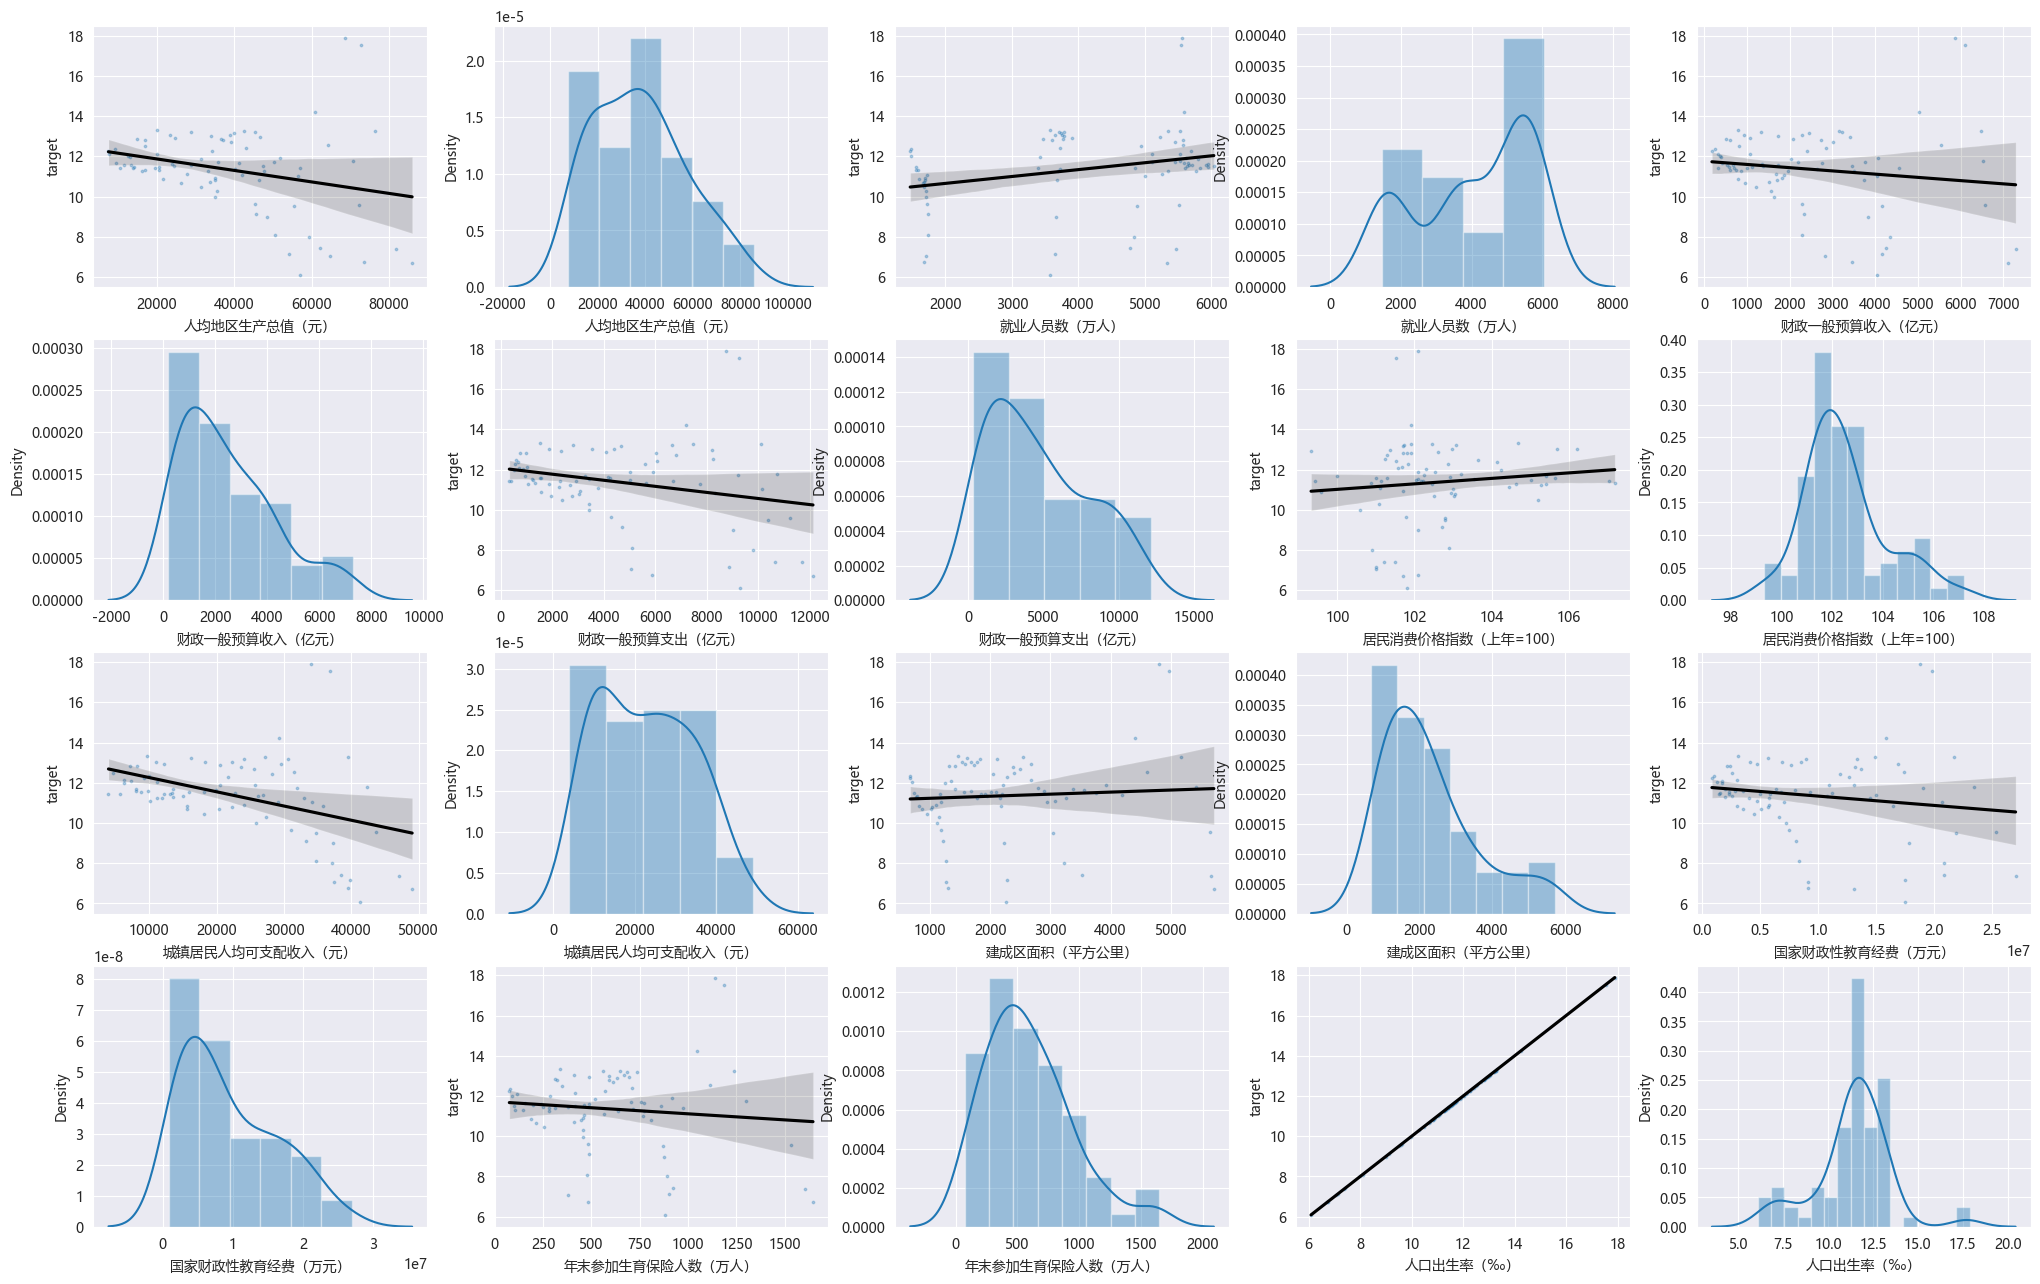

In [4]:
fcols=5
frows=len(df.columns)
plt.figure(figsize=(5*fcols, 4*frows))

i=0
for col in df.columns:
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y=df['人口出生率（‰）'], data=df, ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3}, line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    i+=1

    ax = plt.subplot(frows, fcols, i)
    sns.distplot(df[col].dropna())
    plt.xlabel(col)
plt.savefig(r'所有特征变量和目标的关系.png')

### 数据准备，模型调用

In [5]:
from model import BPNNModel, XGBoostModel, GBDTModel, RandomForestModel
data = pd.read_excel('山河四省.xlsx')
x = ['人均地区生产总值（元）', '就业人员数（万人）', '财政一般预算收入（亿元）', '财政一般预算支出（亿元）',
       '居民消费价格指数（上年=100）', '城镇居民人均可支配收入（元）', '建成区面积（平方公里）', '国家财政性教育经费（万元）',
       '年末参加生育保险人数（万人）']
y = ['人口出生率（‰）']

### 一、BP神经网络

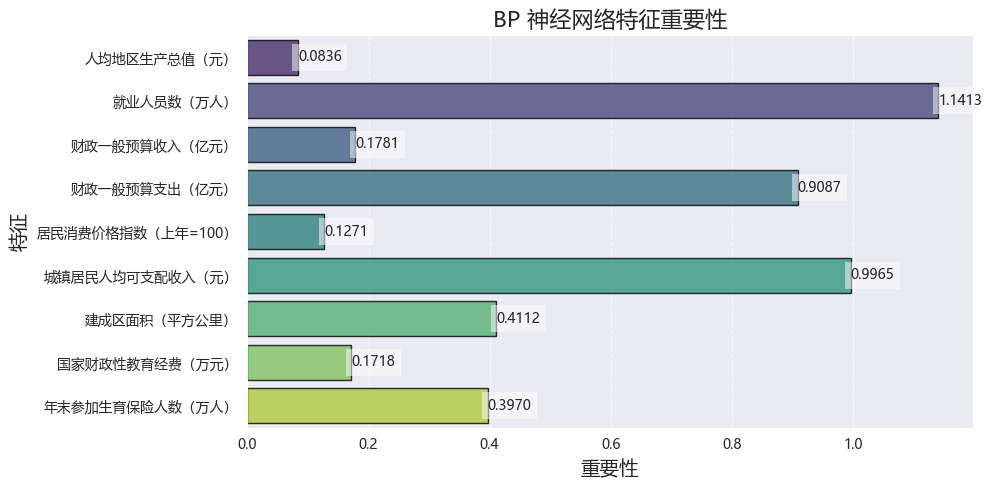

In [6]:
model = BPNNModel(data, x, y, test_num=0.2, solver='adam', learning_rate_init=0.1,
                 learning_rate="constant", alpha=0.0001, max_iter=2000)
var_explain, results_bp, results_df_bp, importance = model.bp_neural_network()
# 可视化特征重要性
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=importance, x='重要性', y='特征', palette='viridis')

plt.title('BP 神经网络特征重要性', fontsize=16)
plt.xlabel('重要性', fontsize=14)
plt.ylabel('特征', fontsize=14)

# 在条形上显示重要性值，并设置背景颜色
for index, value in enumerate(importance['重要性']):
    barplot.patches[index].set_edgecolor('black')  # 设置边框颜色
    barplot.patches[index].set_alpha(0.8)  # 设置透明度
    plt.text(value, index, f'{value:.4f}', fontsize=10, 
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r'BP神经网络特征重要性.png')
plt.show()


### 二、随机森林

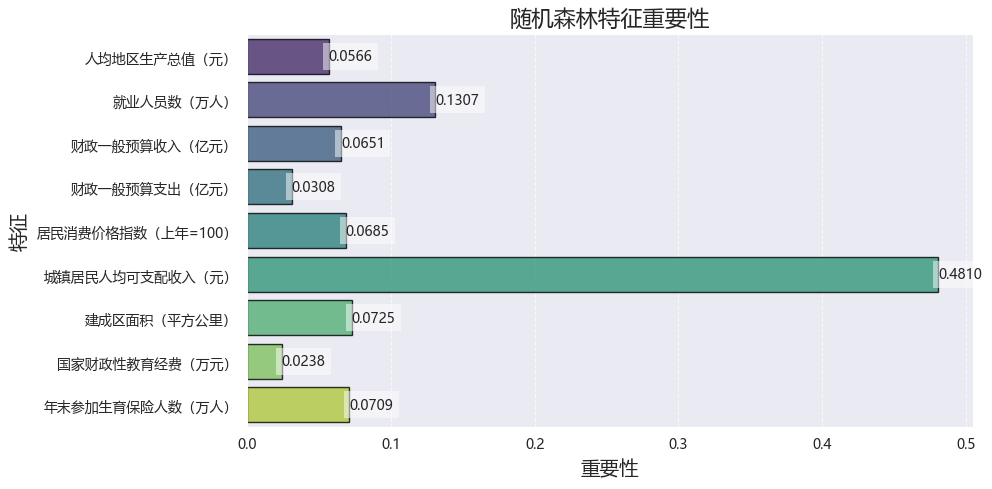

In [7]:
model = RandomForestModel(data, x, y, test_num=0.2, n_estimators=200, max_depth=10)
params, results_RF, results_df_rf, selected_features = model.train()
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=selected_features, x='重要性', y='特征', palette='viridis')

plt.title('随机森林特征重要性', fontsize=16)
plt.xlabel('重要性', fontsize=14)
plt.ylabel('特征', fontsize=14)

# 在条形上显示重要性值，并设置背景颜色
for index, value in enumerate(selected_features['重要性']):
    barplot.patches[index].set_edgecolor('black')  # 设置边框颜色
    barplot.patches[index].set_alpha(0.8)  # 设置透明度
    plt.text(value, index, f'{value:.4f}', fontsize=10, 
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r'随机森林特征重要性.png')
plt.show()

### 三、GBDT

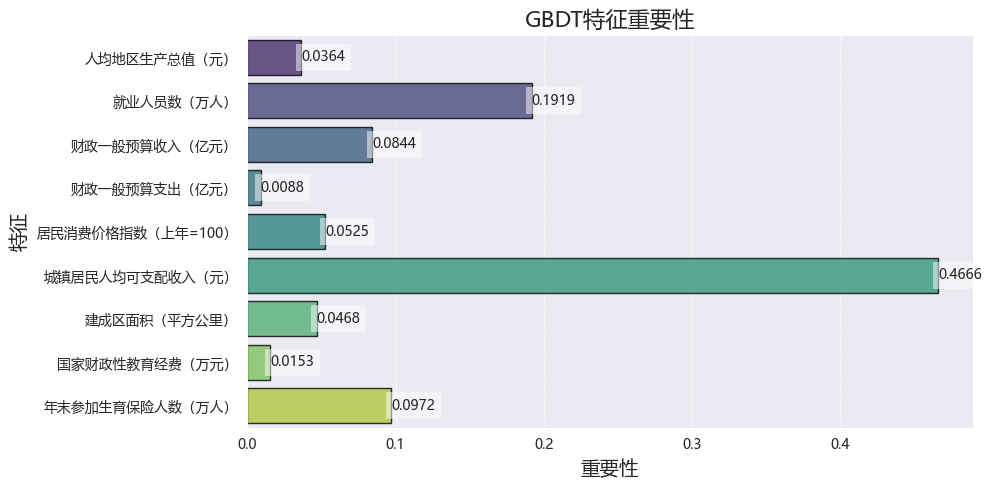

In [8]:
model = GBDTModel(data, x, y, test_num=0.2, n_estimators=200, learning_rate=0.1, max_depth=3)
params, results, results_df_gb, selected_features = model.train()
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=selected_features, x='重要性', y='特征', palette='viridis')

plt.title('GBDT特征重要性', fontsize=16)
plt.xlabel('重要性', fontsize=14)
plt.ylabel('特征', fontsize=14)

# 在条形上显示重要性值，并设置背景颜色
for index, value in enumerate(selected_features['重要性']):
    barplot.patches[index].set_edgecolor('black')  # 设置边框颜色
    barplot.patches[index].set_alpha(0.8)  # 设置透明度
    plt.text(value, index, f'{value:.4f}', fontsize=10, 
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(r'GBDT特征重要性.png')
plt.show()

### 四、XGBoost

In [9]:
x = ['人均地区生产总值（元）', '就业人员数（万人）', '财政一般预算支出（亿元）',
       '居民消费价格指数（上年=100）', '城镇居民人均可支配收入（元）']
y = ['人口出生率（‰）']

In [10]:
model = XGBoostModel(data, x, y, test_num=0.2, cv_folds=5, use_bayesian_optimization=False)
_, params, cv_results, results_df_xgb, selected_features, metrics, train_metric = model.train()
print(metrics)
print(train_metric)
# plt.figure(figsize=(10, 5))
# barplot = sns.barplot(data=selected_features, x='重要性', y='特征', palette='viridis')
# 
# plt.title('XGBoost特征重要性', fontsize=16)
# plt.xlabel('重要性', fontsize=14)
# plt.ylabel('特征', fontsize=14)
# 
# # 在条形上显示重要性值，并设置背景颜色
# for index, value in enumerate(selected_features['重要性']):
#     barplot.patches[index].set_edgecolor('black')  # 设置边框颜色
#     barplot.patches[index].set_alpha(0.8)  # 设置透明度
#     plt.text(value, index, f'{value:.4f}', fontsize=10, 
#              ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
# 
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig(r'XGBoost特征重要性.png')
# plt.show()

                          0
均方误差[MSE]          0.271113
均方根误差[RMSE]        0.520685
平均绝对误差[MAE]        0.415116
绝对误差中位数[MedianAE]  0.329398
平均绝对百分比误差[MAPE]    0.033802
决定系数               0.881672
                              0
均方误差[MSE]          3.086742e-07
均方根误差[RMSE]        5.555846e-04
平均绝对误差[MAE]        4.298267e-04
绝对误差中位数[MedianAE]  3.152657e-04
平均绝对百分比误差[MAPE]    3.827280e-05
决定系数               9.999999e-01


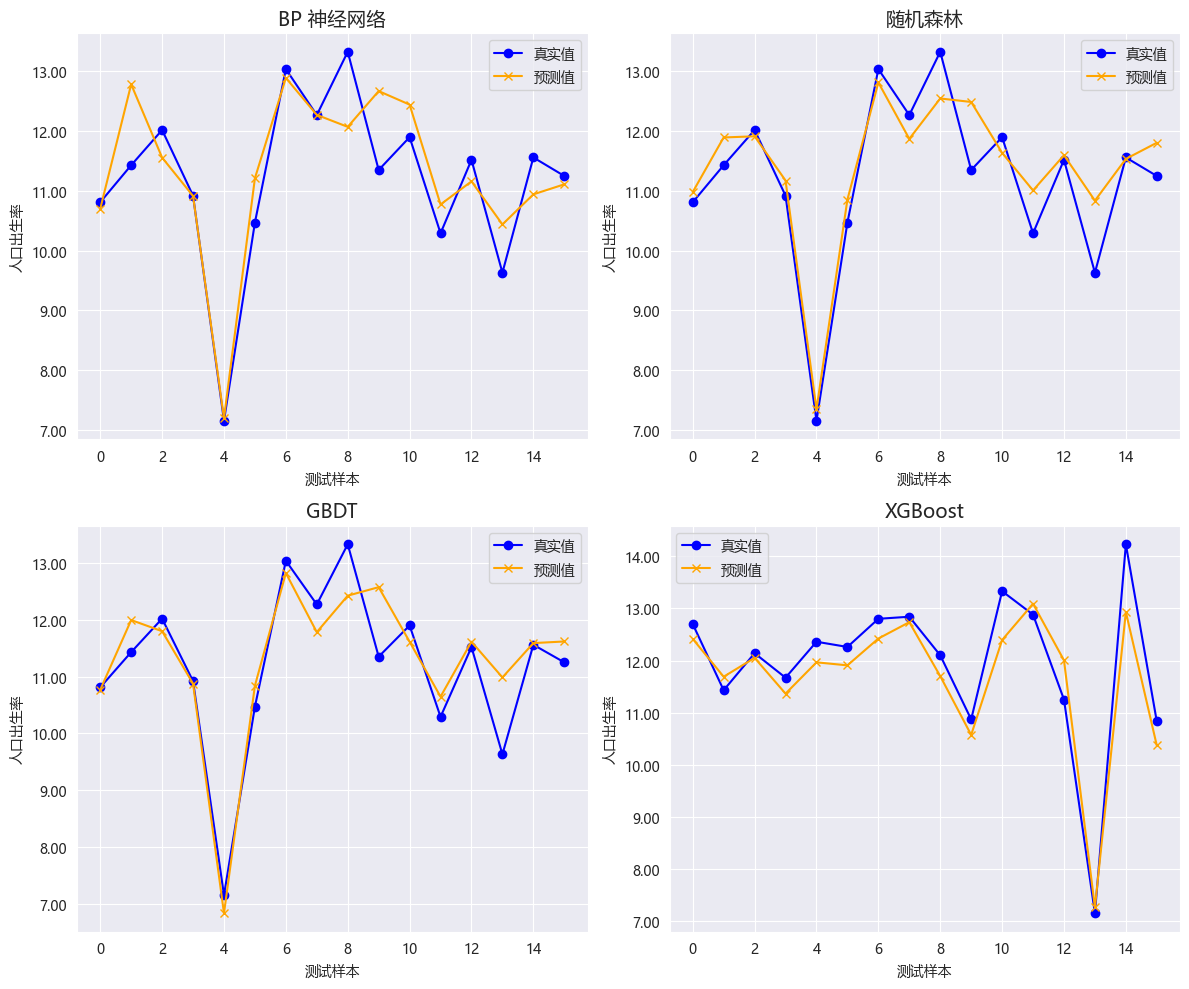

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 设置字体大小和样式（可选）
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# 绘制 BP 神经网络的预测结果
axs[0, 0].plot(results_df_bp.index, results_df_bp['真实值'], label='真实值', color='blue', marker='o')
axs[0, 0].plot(results_df_bp.index, results_df_bp['预测值'], label='预测值', color='orange', marker='x')
axs[0, 0].set_title('BP 神经网络')
axs[0, 0].set_xlabel('测试样本')
axs[0, 0].set_ylabel('人口出生率')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 绘制随机森林的预测结果
axs[0, 1].plot(results_df_rf.index, results_df_rf['真实值'], label='真实值', color='blue', marker='o')
axs[0, 1].plot(results_df_rf.index, results_df_rf['预测值'], label='预测值', color='orange', marker='x')
axs[0, 1].set_title('随机森林')
axs[0, 1].set_xlabel('测试样本')
axs[0, 1].set_ylabel('人口出生率')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 绘制 GBDT 的预测结果
axs[1, 0].plot(results_df_gb.index, results_df_gb['真实值'], label='真实值', color='blue', marker='o')
axs[1, 0].plot(results_df_gb.index, results_df_gb['预测值'], label='预测值', color='orange', marker='x')
axs[1, 0].set_title('GBDT')
axs[1, 0].set_xlabel('测试样本')
axs[1, 0].set_ylabel('人口出生率')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 绘制 XGBoost 的预测结果
axs[1, 1].plot(results_df_xgb.index, results_df_xgb['真实值'], label='真实值', color='blue', marker='o')
axs[1, 1].plot(results_df_xgb.index, results_df_xgb['预测值'], label='预测值', color='orange', marker='x')
axs[1, 1].set_title('XGBoost')
axs[1, 1].set_xlabel('测试样本')
axs[1, 1].set_ylabel('人口出生率')
axs[1, 1].legend()
axs[1, 1].grid(True)

# 设置 y 轴格式保留两位小数
for ax in axs.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('模型预测对比.png')

# 显示图像
plt.show()


### 贝叶斯优化

In [12]:
x = ['人均地区生产总值（元）', '就业人员数（万人）', '财政一般预算支出（亿元）',
       '居民消费价格指数（上年=100）', '城镇居民人均可支配收入（元）']
y = ['人口出生率（‰）']

In [13]:
model = XGBoostModel(data, x, y, test_num=0.2, cv_folds=5, use_bayesian_optimization=True)
_, params, cv_results, results_df_xgb, selected_features, metrics, train_metric = model.train()
print(metrics)
print(train_metric)

                          0
均方误差[MSE]          0.575881
均方根误差[RMSE]        0.758869
平均绝对误差[MAE]        0.600579
绝对误差中位数[MedianAE]  0.578476
平均绝对百分比误差[MAPE]    0.050252
决定系数               0.748654
                          0
均方误差[MSE]          0.000408
均方根误差[RMSE]        0.020204
平均绝对误差[MAE]        0.016619
绝对误差中位数[MedianAE]  0.014158
平均绝对百分比误差[MAPE]    0.001481
决定系数               0.999909
